### Branch and Bound  

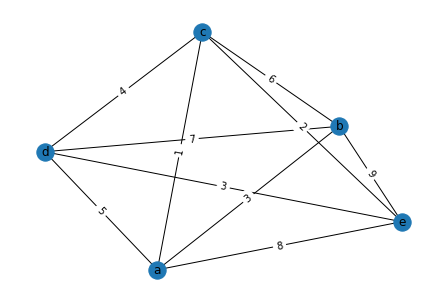

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

def drawGraph(G):
    layout = nx.spring_layout(G)
    nx.draw(G, layout)
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=nx.get_edge_attributes(G, 'weight'))
    labels = {i: chr(ord('a') + i) for i in range(len(A))}
    nx.draw_networkx_labels(G, pos=layout, labels=labels)
    plt.show()

A = [[0, 3, 1, 5, 8],
    [3, 0, 6, 7, 9],
    [1, 6, 0, 4, 2],
    [5, 7, 4, 0, 3],
    [8, 9, 2, 3, 0]]

G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
drawGraph(G)

## generate a weighted graph
G2 = nx.complete_graph(100)
for (u, v) in G2.edges():
    G2[u][v]['weight'] = np.random.randint(1, 10)

In [51]:
class Node:
    def __init__(self, bound, cost, level, solution):
        self.bound = bound
        self.cost = cost
        self.level = level
        self.solution = solution

def findTwoMinimalEdges(list):
    min1 = np.inf
    min2 = np.inf
    for j in list:
        if list[j]['weight'] < min1:
            min2 = min1
            min1 = list[j]['weight']
        elif list[j]['weight'] < min2:
            min2 = list[j]['weight']
    return min1, min2

def findInitialBound(G):
    bound = 0
    initialBoundEdges = np.zeros((G.number_of_nodes(), 2), dtype=list)
    for i in range(G.number_of_nodes()):
        min1, min2 = findTwoMinimalEdges(G[i])
        initialBoundEdges[i][0] = min1
        initialBoundEdges[i][1] = min2
        bound += min1 + min2
    return math.ceil(bound / 2), initialBoundEdges

def findBound(G, solution, initialBoundEdges):
    changedEdges = np.zeros(G.number_of_nodes(), dtype=int)
    newEdges = initialBoundEdges.copy()
    for i in range(len(solution) - 1):
        edgeWeight = G[solution[i]][solution[i + 1]]['weight']
        if newEdges[solution[i]][0] != edgeWeight:
            if (changedEdges[solution[i]] == 0):
                newEdges[solution[i]][1] = edgeWeight
            else:
                newEdges[solution[i]][0] = edgeWeight
            changedEdges[solution[i]] += 1
        if newEdges[solution[i + 1]][0] != edgeWeight:
            if (changedEdges[solution[i + 1]] == 0):
                newEdges[solution[i + 1]][1] = edgeWeight
            else:
                newEdges[solution[i + 1]][0] = edgeWeight
            changedEdges[solution[i + 1]] += 1
    print(newEdges)
    sum = np.sum(newEdges)
    return math.ceil(sum / 2)

def findInList(list, element):
    try:
        index = list.index(element)
        return index
    except ValueError:
        return -1

def branchAndBoundTSP(G):
    root = Node(0, 0, 0, [0])
    queue = [root]  
    best = np.inf
    solution = None
    initialBound, initialBoundEdges = findInitialBound(G)
    while queue:
        node = queue.pop(0)

In [66]:
initialBound, initialBoundEdges = findInitialBound(G)
print(initialBound)
print(initialBoundEdges)
findBound(G, [0, 1, 2, 4, 4, 0], initialBoundEdges)

14
[[1 3]
 [3 6]
 [1 2]
 [3 4]
 [2 3]]


KeyError: 4